In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [10]:
# Classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



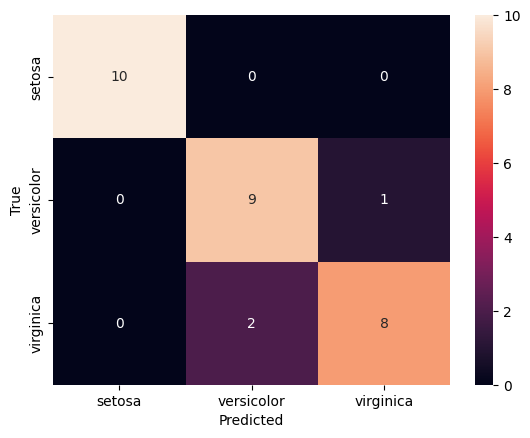

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Add predictions to the DataFrame
df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['true_species'] = y_test
df_test['predicted_species'] = y_pred

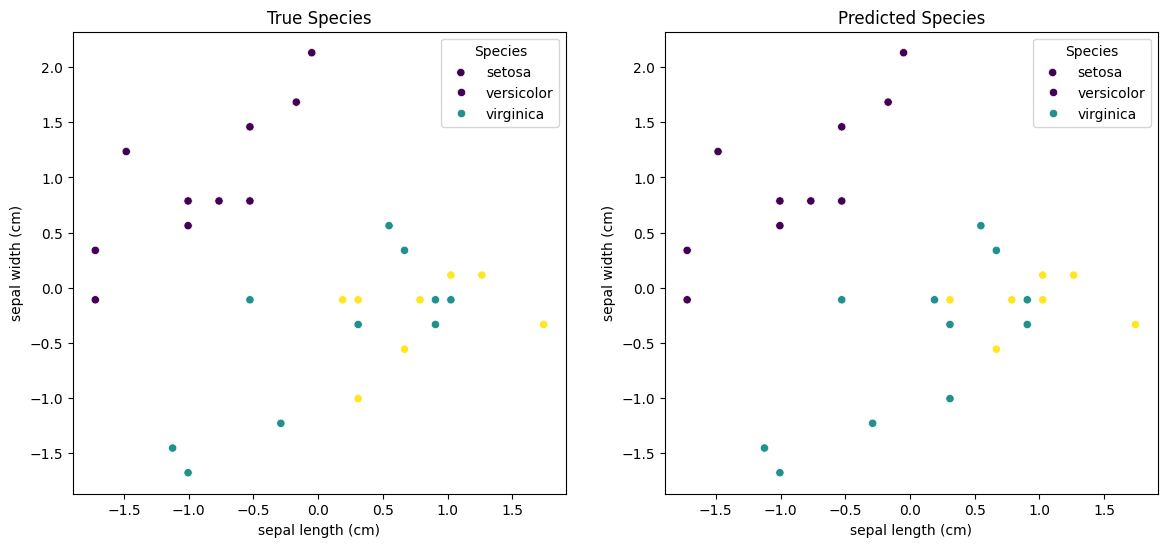

In [14]:
# Plot the true species
plt.figure(figsize=(14, 6))

# Plot 1: True labels
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_test, x='sepal length (cm)', y='sepal width (cm)', hue='true_species', palette='viridis', legend='full')
plt.title('True Species')
plt.legend(title='Species', labels=iris.target_names)

# Plot 2: Predicted labels
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_test, x='sepal length (cm)', y='sepal width (cm)', hue='predicted_species', palette='viridis', legend='full')
plt.title('Predicted Species')
plt.legend(title='Species', labels=iris.target_names)

plt.show()